In [2]:
include("code/sinkhorn.jl")
include("code/barycenter.jl")

using PyPlot
using FFTW

# Formulation of unbalanced ot:
Let $a,b\in \mathbb{R}^N$.

KL divergence:
$$KL(x|a) = \sum_i \log(\frac{x_i}{a_i}x_i - x_1 + a_i),$$
convex, greater or equal to $0$.

For $T \in \mathbb{R}^{N\times N}$, entropy regularization
$$E(T) = -\sum_{i,j} T_{i,j} (\log(T_{i,j}) - 1),$$
concave.

**OT prime problem**:
$$\min_{T\in\mathbb{R}^{N\times N}} \left<T,C\right> - \epsilon E(T) + F_a(T\mathbf{1}_N) + F_b(T^T\mathbf{1}_N),$$
here $C$ is the ground metirc matrix with $C_{i,j} = |x_i-x_j|^2$.
Also the prime problem equivalent to:
$$\min_{T\in\mathbb{R}^{N\times N}} \epsilon KL(T|K) + F_a(T\mathbf{1}_N) + F_b(T^T\mathbf{1}_N),$$
here $K_{i,j} = e^{-C_{i,j}/ \epsilon}$

**Dual problem**:
$$\sup_{f,g\in\mathbb{R}^N} -F_a^* (-f) - F_b^* (-g) - \epsilon \left<e^{f/\epsilon}e^{g/\epsilon}-1, K\right>$$

**Example 1 (OT case)**:

When $F_a(x) = \iota_{=}(x|a) = 0$ as $x=a$, $F_a(x)=\infty$ as $x\neq a$, $F_b(x) = \iota_{=}(x|b)$.
Convex conjugate:
$$F_a^* (y) = \sup_x \left<y,x\right> - F_a(x) = \left<y,a\right>$$
Dual problem:
$$\sup_{f,g\in\mathbb{R}^N} = \left<f,a\right> + \left<g,b\right> - \epsilon \left<e^{f/\epsilon}e^{g/\epsilon}-1, K\right>$$

**Example 2 (Unbalanced case)**:

Let $F_a(x) = \epsilon_m KL(x|a)$, then
$$F_a^*(y) = \sum_i \epsilon_m a_i \left(e^{y_i/ \epsilon_m} - 1\right)$$

**Unbalanced OT distance:**

Suppose we found $T^*$, $f^*$ and $g^*$ for the prime and dual problem:
$$W_{\epsilon, \epsilon_m} (a,b) = \epsilon KL(T^*|K) + F_a(T\mathbf{1}_N) + F_b(T^T\mathbf{1}_N)$$
Also:
$$W_{\epsilon, \epsilon_m} (a,b) = \sum_{i,j} -\epsilon_m a_i \left(e^{-f_i^*/ \epsilon_m} - 1\right) -\epsilon_m b_j \left(e^{-g_j^*/ \epsilon_m} - 1\right) - \epsilon K_{i,j}\left(e^{f_i/\epsilon} e^{g_j/\epsilon}-1\right)$$

Then the gradient w.r.t. $a_i$ is:
$$\nabla_{a_i} W_{\epsilon, \epsilon_m} (a,b) = -\epsilon_m \left(e^{-f_i^*/ \epsilon_m}- 1\right)$$

# 1. Fourier Transform and Barycenter

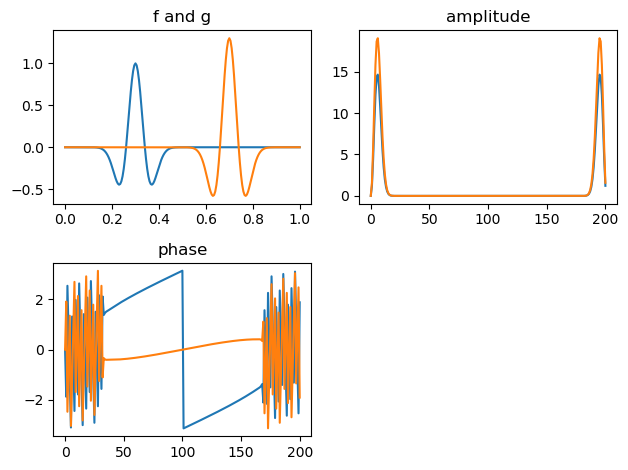

In [19]:
N = 201
x = range(0, stop=1, length=N)
M = cost_matrix_1d(x,x);

f = ricker_func(x, 0.3, 0.04) 
g = 1.3*ricker_func(x, 0.7, 0.04)

f_hat = fft(f);
g_hat = fft(g);
f_abs = abs.(f_hat)
g_abs = abs.(g_hat)
f_ang = angle.(f_hat)
g_ang = angle.(g_hat)

subplot(221)
plot(x,f,x,g); title("f and g")
subplot(222)
plot(f_abs)
plot(g_abs); title("amplitude")
subplot(223)
plot(f_ang)
plot(g_ang); title("phase")
tight_layout()

# 2. OT: gradient and regularization

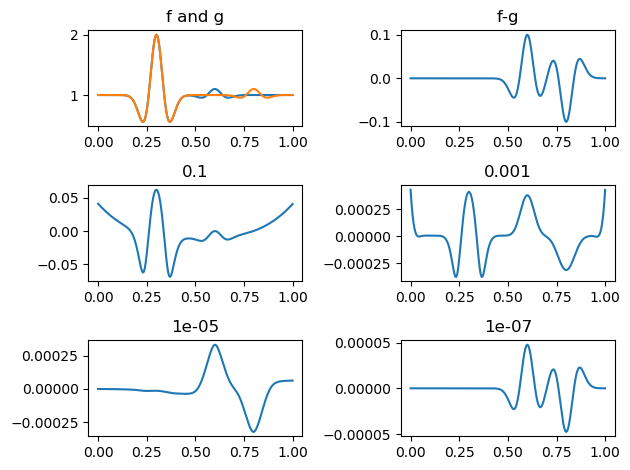

In [53]:
N = 201
x = range(0, stop=1, length=N)
M = cost_matrix_1d(x,x);

f = ricker_func(x, 0.3, 0.04) + 0.1 * ricker_func(x, 0.6, 0.04)
g = ricker_func(x, 0.3, 0.04) + 0.1 * ricker_func(x, 0.8, 0.04)
f = f .+ 1
g = g .+ 1
subplot(321); plot(x,f,x,g); title("f and g")

subplot(322); plot(x,f-g); title("f-g")

reg = 1e-1
iterMax = 5000
TT, gg ,dd = sinkhorn_1d(f, g, M, reg; iterMax=iterMax)
subplot(323); plot(x,gg); title(reg)

reg = 1e-3
iterMax = 5000
TT, gg ,dd = sinkhorn_1d(f, g, M, reg; iterMax=iterMax)
subplot(324); plot(x,gg); title(reg)

reg = 1e-5
iterMax = 5000
TT, gg ,dd = sinkhorn_1d(f, g, M, reg; iterMax=iterMax)
subplot(325); plot(x,gg); title(reg)

reg = 1e-7
iterMax = 5000
TT, gg ,dd = sinkhorn_1d(f, g, M, reg; iterMax=iterMax)
subplot(326); plot(x,gg); title(reg)

tight_layout()

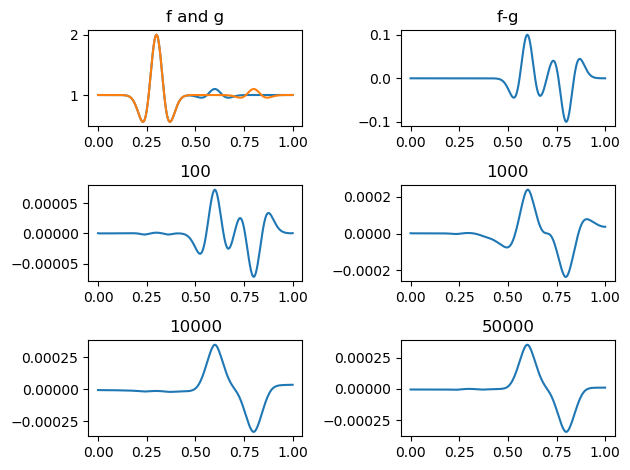

In [49]:
N = 201
x = range(0, stop=1, length=N)
M = cost_matrix_1d(x,x);

f = ricker_func(x, 0.3, 0.04) + 0.1 * ricker_func(x, 0.6, 0.04)
g = ricker_func(x, 0.3, 0.04) + 0.1 * ricker_func(x, 0.8, 0.04)
f = f .+ 1
g = g .+ 1
subplot(321); plot(x,f,x,g); title("f and g")

subplot(322); plot(x,f-g); title("f-g")

reg = 1e-5
iterMax = 100
TT, gg ,dd = sinkhorn_1d(f, g, M, reg; iterMax=iterMax)
subplot(323); plot(x,gg); title(iterMax)

reg = 1e-5
iterMax = 1000
TT, gg ,dd = sinkhorn_1d(f, g, M, reg; iterMax=iterMax)
subplot(324); plot(x,gg); title(iterMax)

reg = 1e-5
iterMax = 10000
TT, gg ,dd = sinkhorn_1d(f, g, M, reg; iterMax=iterMax)
subplot(325); plot(x,gg); title(iterMax)

reg = 1e-5
iterMax = 50000
TT, gg ,dd = sinkhorn_1d(f, g, M, reg; iterMax=iterMax)
subplot(326); plot(x,gg); title(iterMax)

tight_layout()

# 3. Unbalanced OT

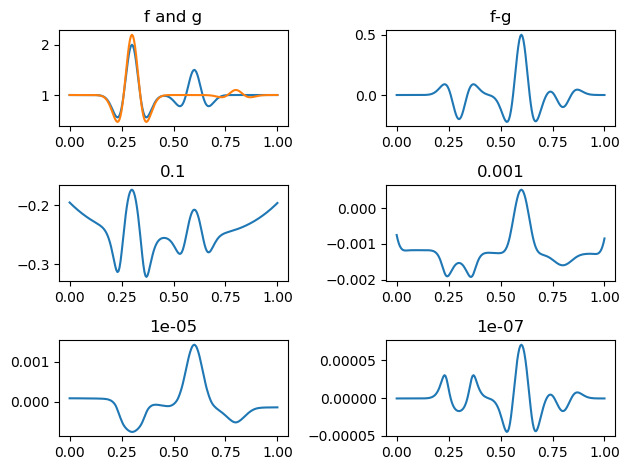

Numerical error. Try to increase reg.


In [54]:
N = 201
x = range(0, stop=1, length=N)
M = cost_matrix_1d(x,x);

f = ricker_func(x, 0.3, 0.04) + 0.5 * ricker_func(x, 0.6, 0.04)
g = 1.2*ricker_func(x, 0.3, 0.04) + 0.1 * ricker_func(x, 0.8, 0.04)
f = f .+ 1
g = g .+ 1
subplot(321); plot(x,f,x,g); title("f and g")

subplot(322); plot(x,f-g); title("f-g")

reg = 1e-1
reg_m = 1e0
iterMax = 10000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(323); plot(x,gg); title(reg)

reg = 1e-3
reg_m = 1e0
iterMax = 10000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(324); plot(x,gg); title(reg)

reg = 1e-5
reg_m = 1e0
iterMax = 10000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(325); plot(x,gg); title(reg)

reg = 1e-7
reg_m = 1e0
iterMax = 10000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(326); plot(x,gg); title(reg)

tight_layout()

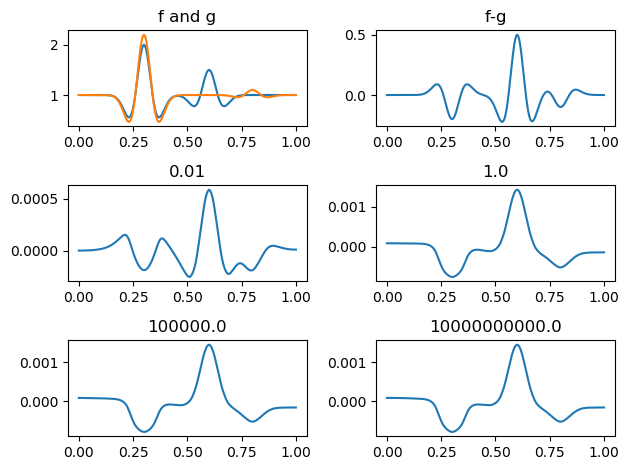

In [59]:
N = 201
x = range(0, stop=1, length=N)
M = cost_matrix_1d(x,x);

f = ricker_func(x, 0.3, 0.04) + 0.5 * ricker_func(x, 0.6, 0.04)
g = 1.2*ricker_func(x, 0.3, 0.04) + 0.1 * ricker_func(x, 0.8, 0.04)
f = f .+ 1
g = g .+ 1
subplot(321); plot(x,f,x,g); title("f and g")

subplot(322); plot(x,f-g); title("f-g")

reg = 1e-5
reg_m = 1e-2
iterMax = 10000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(323); plot(x,gg); title(reg_m)

reg = 1e-5
reg_m = 1e0
iterMax = 10000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(324); plot(x,gg); title(reg_m)

reg = 1e-5
reg_m = 1e5
iterMax = 10000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(325); plot(x,gg); title(reg_m)

reg = 1e-5
reg_m = 1e10
iterMax = 10000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(326); plot(x,gg); title(reg_m)

tight_layout()

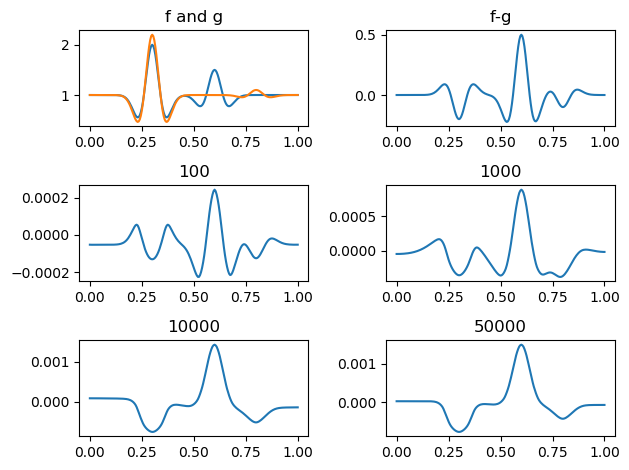

In [58]:
N = 201
x = range(0, stop=1, length=N)
M = cost_matrix_1d(x,x);

f = ricker_func(x, 0.3, 0.04) + 0.5 * ricker_func(x, 0.6, 0.04)
g = 1.2*ricker_func(x, 0.3, 0.04) + 0.1 * ricker_func(x, 0.8, 0.04)
f = f .+ 1
g = g .+ 1
subplot(321); plot(x,f,x,g); title("f and g")

subplot(322); plot(x,f-g); title("f-g")

reg = 1e-5
reg_m = 1e0
iterMax = 100
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(323); plot(x,gg); title(iterMax)

reg = 1e-5
reg_m = 1e0
iterMax = 1000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(324); plot(x,gg); title(iterMax)

reg = 1e-5
reg_m = 1e0
iterMax = 10000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(325); plot(x,gg); title(iterMax)

reg = 1e-5
reg_m = 1e0
iterMax = 50000
TT, gg ,dd = unbalanced_sinkhorn_1d(f, g, M, reg, reg_m; iterMax=iterMax)
subplot(326); plot(x,gg); title(iterMax)

tight_layout()